In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

In [312]:
#load train data
train = pd.read_csv('data/train.csv')
#load test data
test = pd.read_csv('data/test.csv')
#analyze the data
#print information about the data
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [313]:
print(f"Rows in train: {train.shape[0]} Columns in train: {train.shape[1]}")
train.info()

Rows in train: 1460 Columns in train: 81
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual

In [314]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0


In [315]:
print(f"Skewness {train['SalePrice'].skew()}")
print(f"Kurtosis {train['SalePrice'].kurt()}")

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

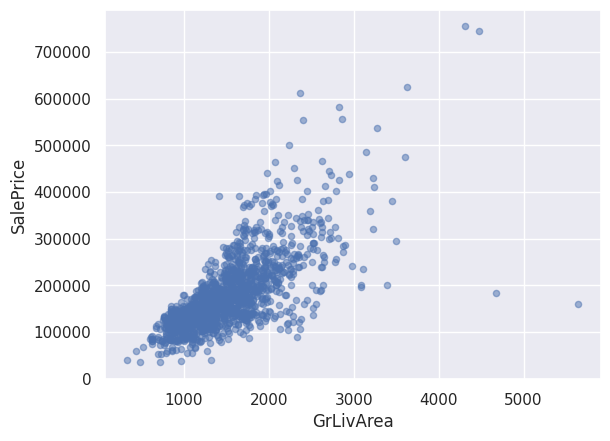

In [316]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha=0.5)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

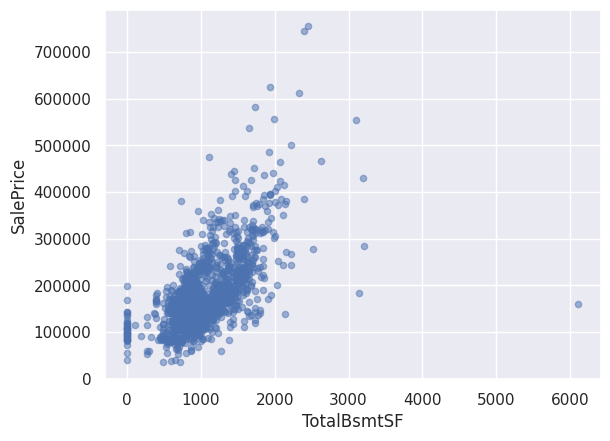

In [317]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha=0.5)

(np.float64(-0.5), np.float64(9.5), np.float64(0.0), np.float64(800000.0))

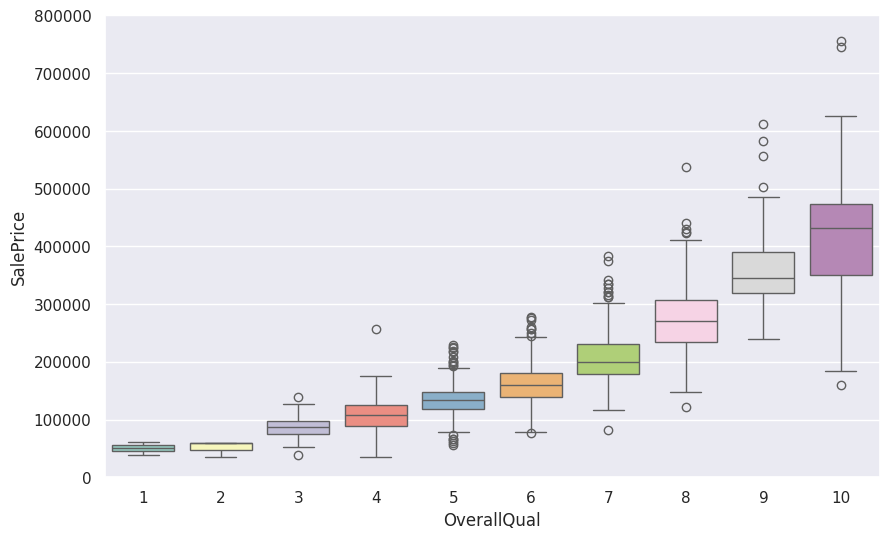

In [318]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data, palette='Set3')
fig.axis(ymin=0, ymax=800000)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

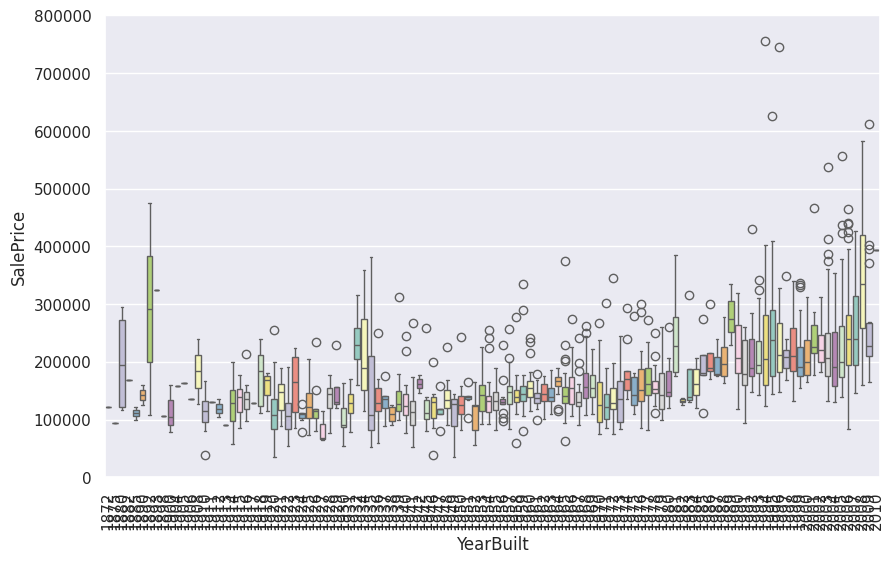

In [319]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data, palette='Set3')
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

<Axes: >

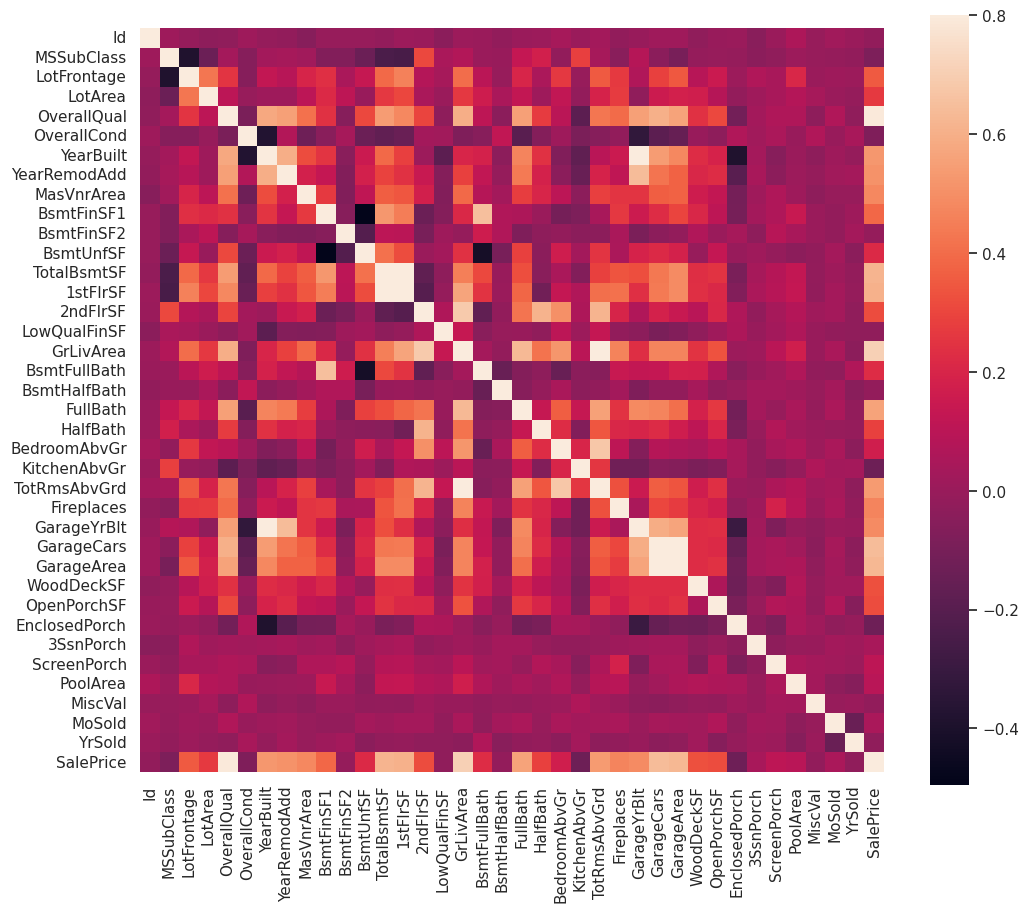

In [320]:
numerical_cols = train.select_dtypes(include=[np.number]).columns
corrmat = train[numerical_cols].corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=0.8, square=True)

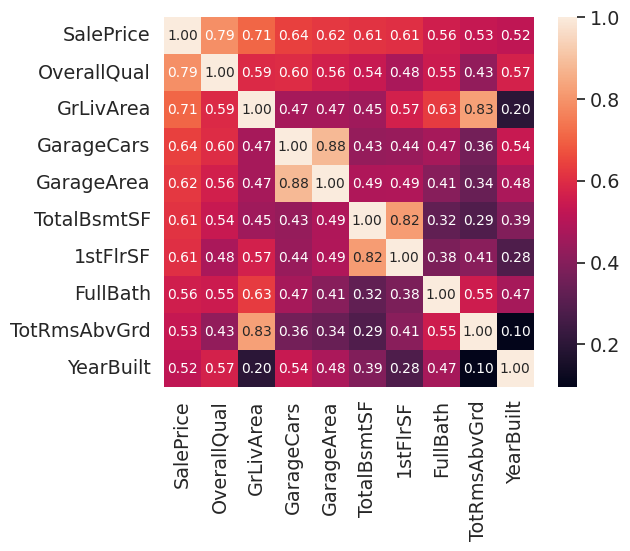

In [321]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                    annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
                 

In [322]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,9.95e-01
MiscFeature,1406,9.63e-01
Alley,1369,9.38e-01
Fence,1179,8.08e-01
MasVnrType,872,5.97e-01
FireplaceQu,690,4.73e-01
LotFrontage,259,1.77e-01
GarageQual,81,5.55e-02
GarageFinish,81,5.55e-02
GarageType,81,5.55e-02


In [323]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train = train.drop((missing_data[missing_data['Total'] > 0.5]).index, axis=1)
train.isnull().sum().max()

np.int64(0)

In [324]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'].values.reshape(-1, 1))
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()[:10]]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()[:10]]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]


(1459, 2)


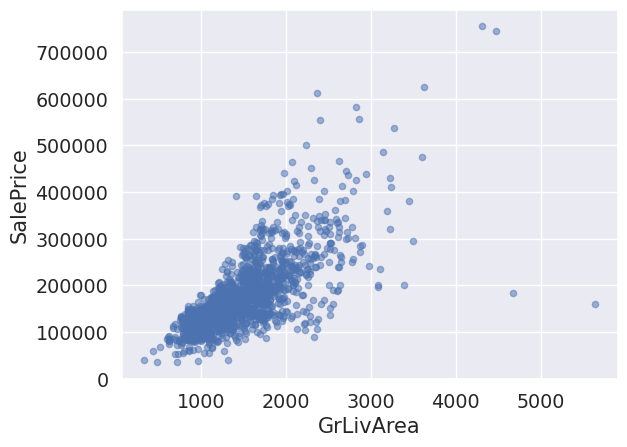

In [325]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha=0.5)
print(data.shape)

In [328]:
print(train.sort_values(by='GrLivArea', ascending=False)[:2])
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
1182  1183          60       RL    15623   Pave      IR1         Lvl   
691    692          60       RL    21535   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   
691     AllPub    Corner       Gtl      NoRidge       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1182     1Fam     2Story           10            5       1996          1996   
691      1Fam     2Story           10            6       1994          1995   

     RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual ExterCond  \
1182       Hip  CompShg     Wd Sdng     ImStucc        Gd        TA   
691      Gable  WdShngl     HdBoard     HdBoard        Ex        TA   

     Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
1182      PConc        2096         

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

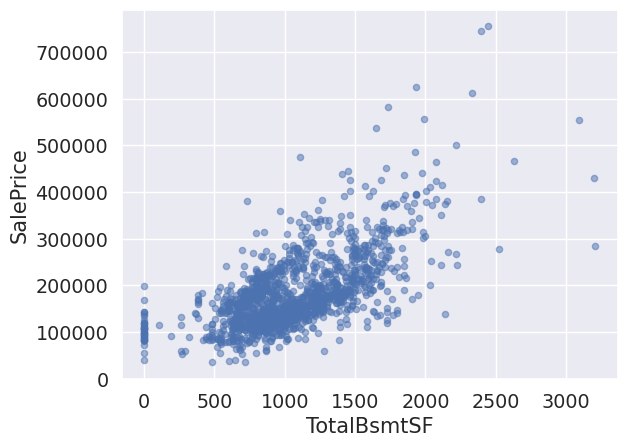

In [329]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', alpha=0.5)

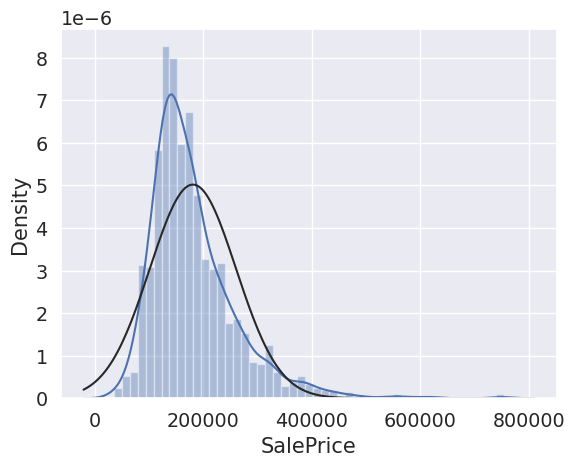

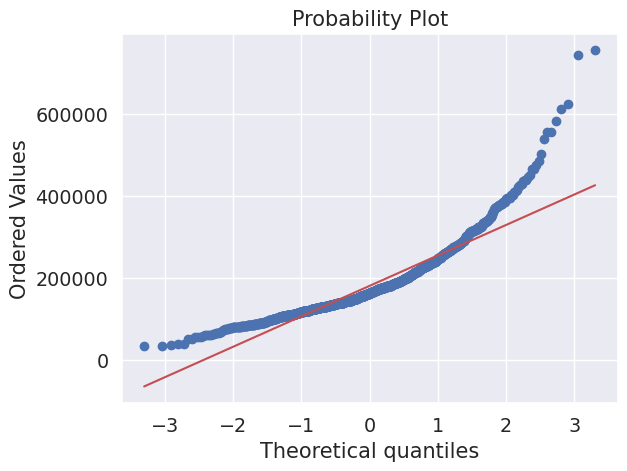

In [ ]:
sns.distplot(train['SalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [ ]:
train['SalePrice'] = np.log(train['SalePrice'])

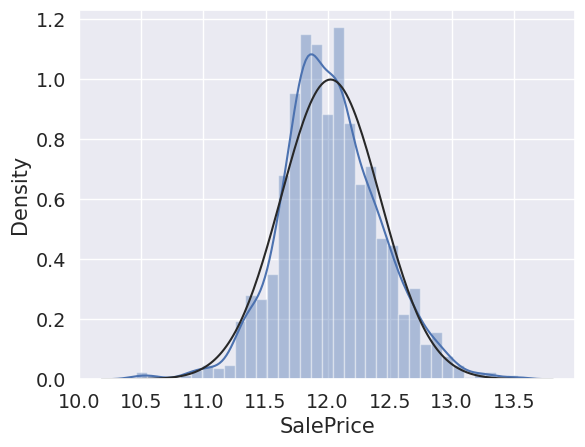

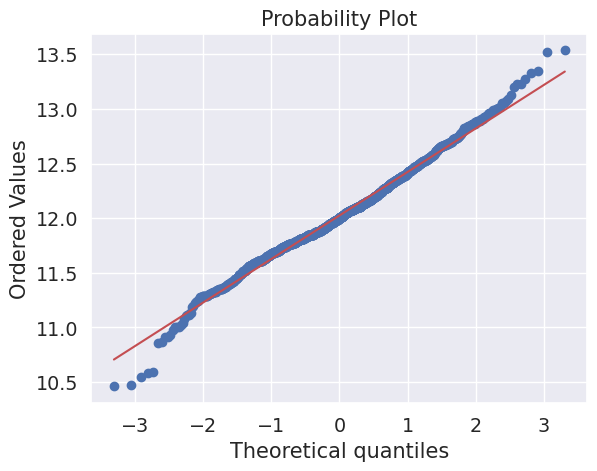

In [333]:
sns.distplot(train['SalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

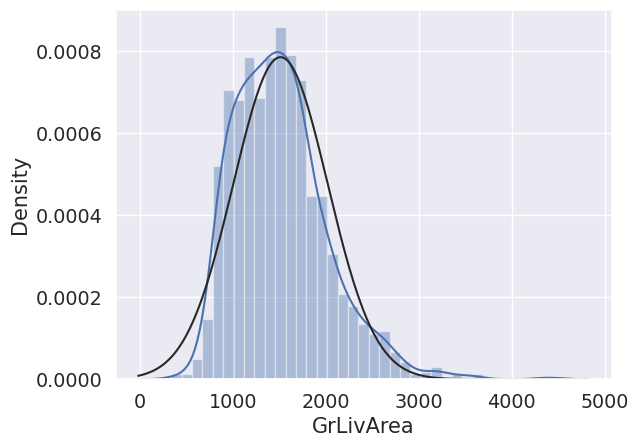

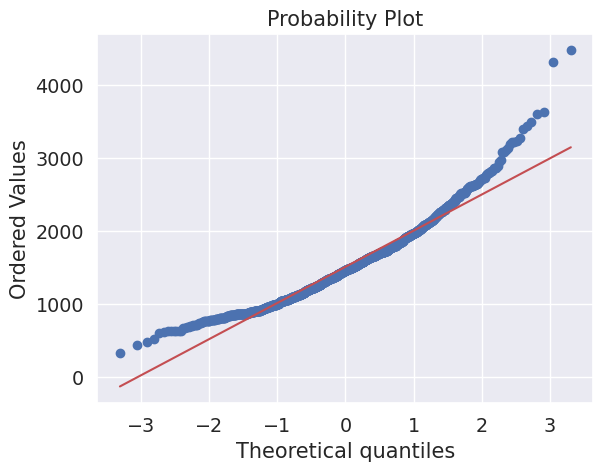

In [336]:
sns.distplot(train['GrLivArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [337]:
train['GrLivArea'] = np.log(train['GrLivArea'])

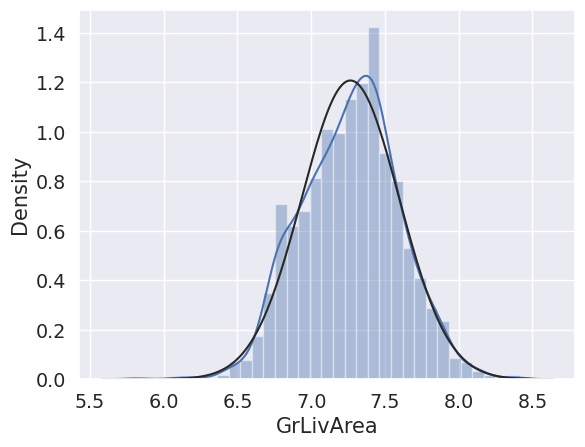

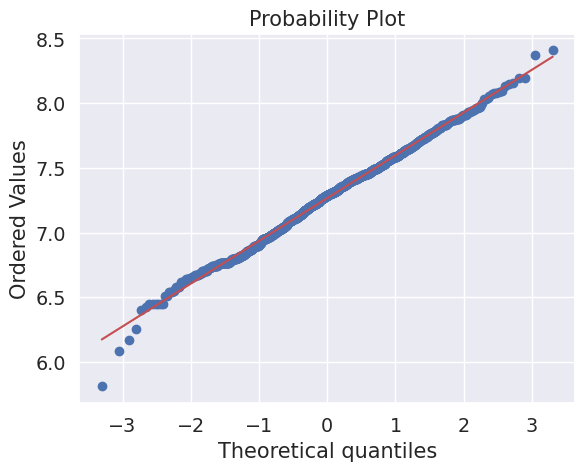

In [338]:
sns.distplot(train['GrLivArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

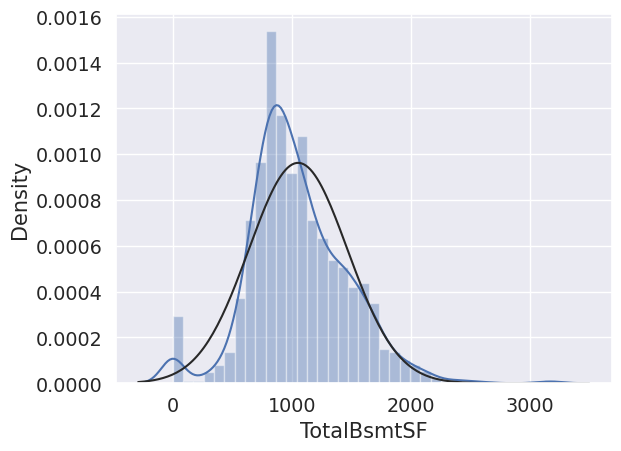

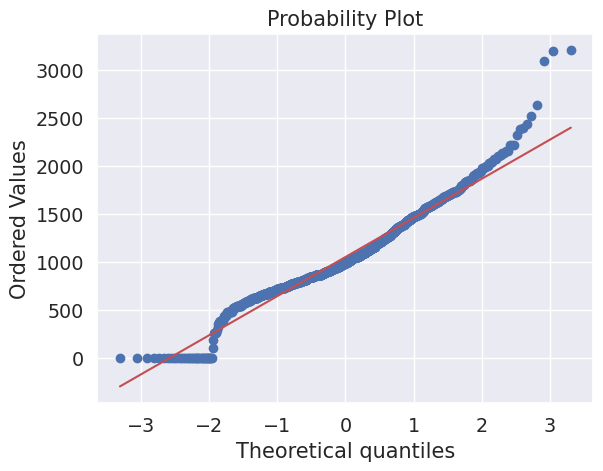

In [339]:
sns.distplot(train['TotalBsmtSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [344]:
train['HasBsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [348]:
train.loc[train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
print(train.loc[train['HasBsmt'] == 1, 'TotalBsmtSF'].head())

0    6.75
1    7.14
2    6.82
3    6.63
4    7.04
Name: TotalBsmtSF, dtype: float64


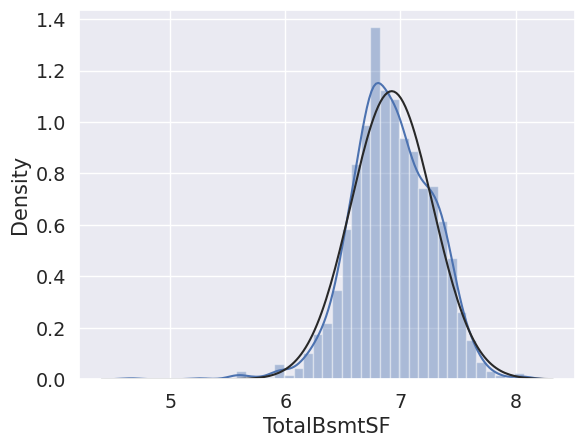

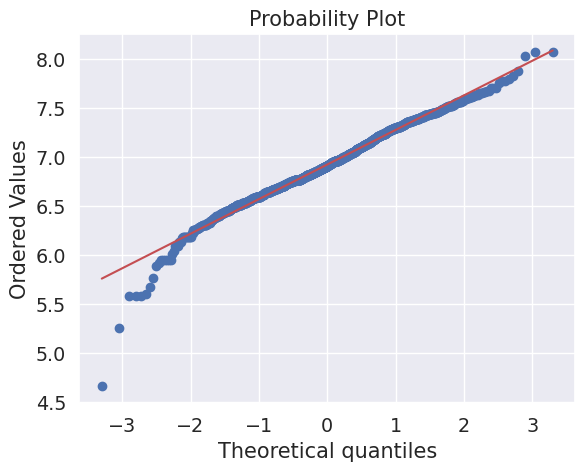

In [350]:
sns.distplot(train[train['HasBsmt']==1]['TotalBsmtSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(train[train['HasBsmt']==1]['TotalBsmtSF'], plot=plt)

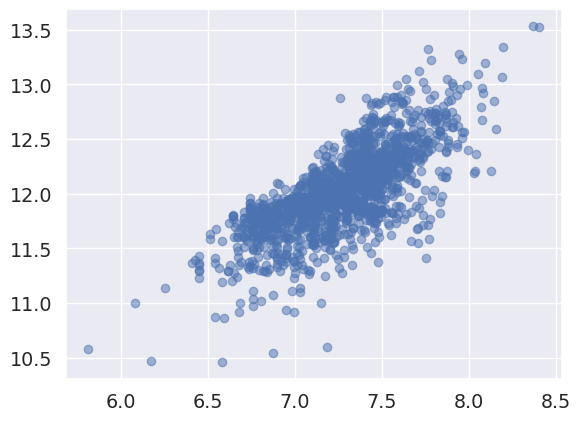

In [353]:
plt.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5)

In [354]:
train = pd.get_dummies(train)